# 1.

In [77]:
import numpy as np

data = np.loadtxt('MCMC_data_set1.txt')

In [78]:
xarr = data[:,0]; yarr = data[:,1]

def quadratic(a,b,c,x):
    return a*x**2 + b*x + c

def chisq_quadratic(a,b,c):
    chisq_val = 0
    for x,y in zip(xarr,yarr):
        model = quadratic(a,b,c,x)
        chisq_val += ((y - model)**2)
    return chisq_val


In [65]:
a_arr = np.linspace(-10,10,51); b_arr = np.linspace(-10,10,51); c_arr = np.linspace(-10,10,51)
A,B,C = np.meshgrid(a_arr,b_arr,c_arr,indexing='ij')
grid_spacing = a_arr[1]-a_arr[0]
print(f'Grid spacing: {grid_spacing}')

Grid spacing: 0.40000000000000036


In [ ]:
minid = np.argmin(chisq_quadratic(A,B,C))
mina, minb, minc = A.flatten()[minid], B.flatten()[minid], C.flatten()[minid]
print(f'Minimum chi-square at a={mina}, b={minb}, c={minc},\
 psuedo chisq = {chisq_quadratic(mina,minb,minc)}')

Minimum chi-square at a=0.40000000000000036, b=1.200000000000001, c=-1.1999999999999993, psuedo chisq = 549.5218390201585


# 2

In [5]:
import numpy as np

data = np.loadtxt('MCMC_data_set1.txt')
xarr = data[:,0]; yarr = data[:,1]

def quadratic(a,b,c,x):
    return a*x**2 + b*x + c

def chisq_quadratic(a,b,c):
    chisq_val = 0
    for x,y in zip(xarr,yarr):
        model = quadratic(a,b,c,x)
        chisq_val += ((y - model)**2)
    return chisq_val

In [48]:
def MCMC(chisq, width, **kwargs):
    len_chain = kwargs['len_chain'] if 'len_chain' in kwargs else 1000
    ndim = kwargs['ndim'] if 'ndim' in kwargs else 3
    theta_old = np.random.uniform(-10,10, size = ndim)
    print(f'theta_old: {theta_old}')
    minus_loglike_old = -chisq(*theta_old)/2
    chain = [theta_old]
    loglike = [minus_loglike_old]
    weights = [1]
    step  = 0
    while step < len_chain:
        theta_new = theta_old + np.random.normal(0,width, size=ndim)
        minus_loglike_new = -chisq(*theta_new)/2 #-loglike =  - chi^2/2
        if minus_loglike_new > minus_loglike_old:  # new step has better likelihood
            chain.append(theta_new)
            loglike.append(minus_loglike_new)
            weights.append(1)
            theta_old = theta_new
            minus_loglike_old = minus_loglike_new
        else:   # new step has worse likelihood
            log_accept_prob = np.log(np.random.uniform(0,1))
            loglike_ratio = (minus_loglike_new - minus_loglike_old)
            if loglike_ratio > log_accept_prob: # accept the new step
                chain.append(theta_new)
                loglike.append(minus_loglike_new)
                weights.append(np.exp(-loglike_ratio))
                theta_old = theta_new
                minus_loglike_old = minus_loglike_new
            else:   # reject the new step
                weights[-1] += 1
        step += 1
    return np.array(chain), np.array(weights), np.array(loglike)


In [63]:
chain_cube, weights_cube, loglike_cube = MCMC(chisq_quadratic, width=1, len_chain=5000, ndim=3)

theta_old: [-1.1558555  -7.43260312 -2.61819039]


5001
[ 0.49769074  0.3487784  -0.22362497]
-235.69381950032613


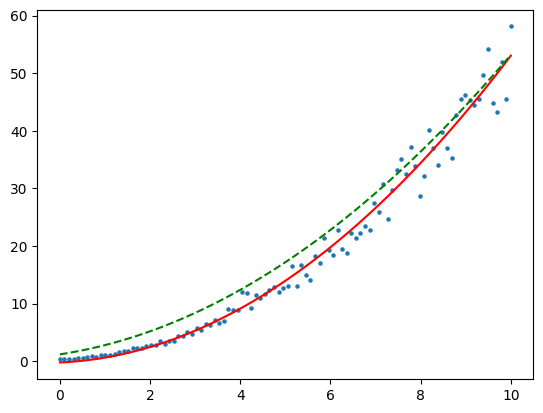

In [79]:
print(sum(weights_cube))
print(chain_cube[np.argmax(loglike_cube)]);  print(np.max(loglike_cube))
import matplotlib.pyplot as plt
plt.scatter(xarr, yarr, s=5)
plt.plot(xarr, quadratic(*chain_cube[np.argmax(loglike_cube)], xarr), color='red')
plt.plot(xarr, quadratic(0.4,1.2, 1.19, xarr), color='green', linestyle='dashed')

## 3.

In [143]:
np.random.normal(0,[10,2,3], size=3)

array([ 6.09406123, -3.34661572, -0.14455046])

In [125]:
import numpy as np

data2 = np.loadtxt('MCMC_data_set2.txt')
xarr2 = data2[:, 0]
yarr2 = data2[:, 1]

def theory(a,b,c,d,e,f,x):
    return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f

def chisq_theory(a,b,c,d,e,f):
    chisq_val = 0
    for x,y in zip(xarr2,yarr2):
        model = theory(a,b,c,d,e,f,x)
        yerr = y/100
        chisq_val += ((y - model)**2) / yerr**2
    return chisq_val

In [153]:
chain_th, weights_th, loglike_th = MCMC(chisq_theory, width=[0.005,0.005,0.01,0.1,0.1,0.1], len_chain=10000, ndim=6)
print(f'accept ratio: {len(weights_th)/sum(weights_th)}')

theta_old: [ 4.01205172 -5.58283542  9.67682683 -8.47240891 -6.74642651  5.84978944]
accept ratio: 0.10294869339086676


In [138]:
print(f'best fit : {chain_th[np.argmax(loglike_th)]}')
print(f'max loglike : {np.max(loglike_th)}')

best fit : [ 0.87198306  1.33874943 -2.94433516  4.107315   -0.35285443  0.27748016]
max loglike : -5175.371589880575


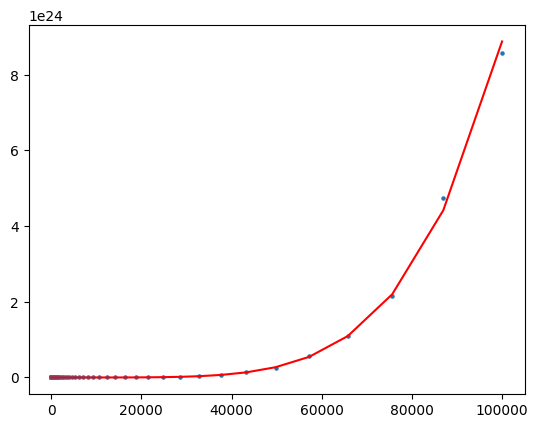

In [130]:
import matplotlib.pyplot as plt

plt.scatter(xarr2, yarr2, s=5)
plt.plot(xarr2, theory(*chain_th[np.argmax(loglike_th)], xarr2), color='red')